## IRIS FLOWER CLASSIFICATION

### Loading and describing the dataset:

In [1]:
#importing all the required packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris
import  matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the data from csv file to a Pandas DataFrame
iris=pd.read_csv('Downloads/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 6)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [9]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
display(pd.DataFrame(iris.Species.value_counts()))

,Species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


### Exploratory Data Analysis:

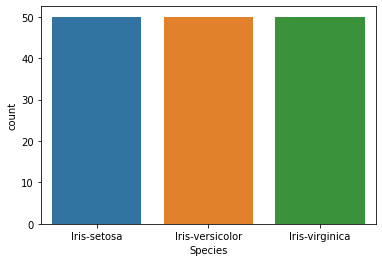

In [12]:
sns.countplot(x='Species', data=iris, )
plt.show()

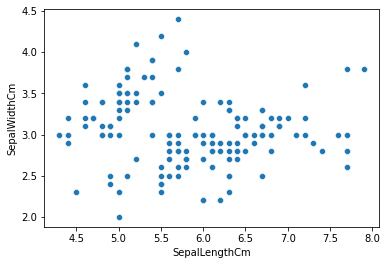

In [13]:
sns.scatterplot(iris['SepalLengthCm'], iris['SepalWidthCm'])
plt.show()


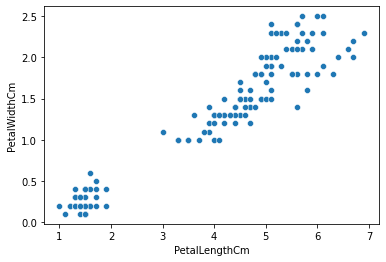

In [14]:
sns.scatterplot(iris['PetalLengthCm'], iris['PetalWidthCm'])
plt.show()

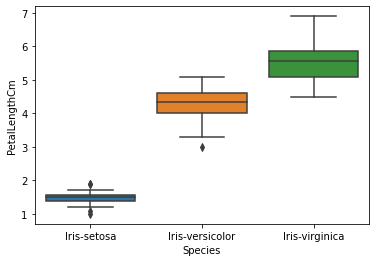

In [15]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris )
plt.show()

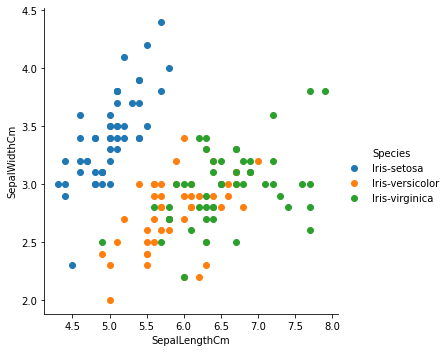

In [16]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

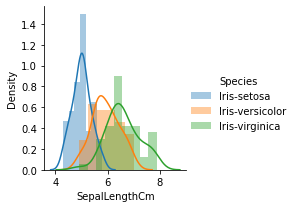

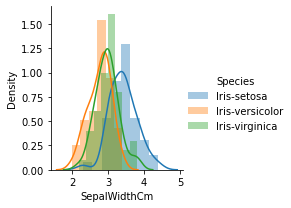

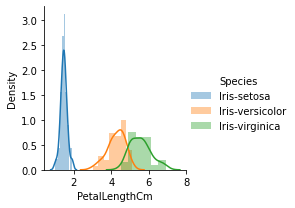

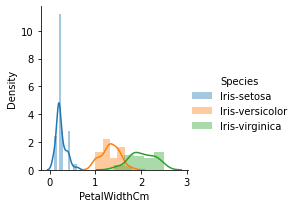

In [17]:
plot = sns.FacetGrid(iris,hue="Species")
plot.map(sns.distplot,"SepalLengthCm").add_legend()
plot = sns.FacetGrid(iris,hue="Species")
plot.map(sns.distplot,"SepalWidthCm").add_legend()
plot = sns.FacetGrid(iris,hue="Species")
plot.map(sns.distplot,"PetalLengthCm").add_legend()
plot = sns.FacetGrid(iris,hue="Species")
plot.map(sns.distplot,"PetalWidthCm").add_legend()
plt.show()

In [18]:
iris.corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Model Training:

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
iris.Species = le.fit_transform(iris.Species)

In [21]:
iris = iris.drop('Id',axis=1)
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

In [22]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
model=LinearRegression()

In [25]:
a=model.fit(X_train,y_train)

In [26]:
a

LinearRegression()

In [27]:
print(a.score(X_test,y_test))

0.9111345195289412


In [28]:
pred=a.predict(X_test)
pred

array([-9.15671304e-02, -1.14559174e-01,  2.05168874e+00,  1.33700260e+00,
        5.73806643e-02,  2.03989383e+00,  1.30905851e-03,  1.20110526e+00,
       -8.81089690e-02, -7.88666796e-02, -2.67258860e-02,  1.81715119e+00,
        1.38790866e+00,  1.59117874e+00,  1.37288224e+00,  1.59276348e+00,
        5.09711906e-03,  1.18225057e+00, -3.74714859e-02,  1.52304366e+00,
        1.74574609e+00,  1.80299111e+00,  1.32074145e+00, -8.17998431e-03,
        1.90335952e+00,  1.20116658e+00,  1.14780059e-02, -6.73597462e-02,
        1.60517525e+00,  1.21676965e+00,  2.23744111e+00, -9.00339015e-03,
        1.16740883e+00,  6.59648723e-02,  1.29503075e+00,  1.66305896e+00,
        1.41242412e+00,  2.27243006e-01])

In [29]:
from sklearn import metrics as m

In [30]:
m.mean_absolute_error(y_test,pred)

0.190839974759886

In [31]:
m.mean_squared_error(y_test,pred)

0.059818038101017414

In [32]:
!pip install gradio

In [33]:
def classify(num):
    if num<0.5:
        return 'Setosa'
    elif num <1.5:
        return 'Versicolor'
    else:
        return 'Virginica'

In [34]:
import gradio as gr
import numpy as np
def predict_flower(sl,sw,pl,pw):
    input_array=np.array([[sl,sw,pl,pw]])
    pred=a.predict(input_array)
    output=classify(pred[0])
    if output=='Setosa':
        return [(0,output)]
    elif output=='Versicolor':
        return [(1,output)]
    else:
        return [(2,output)]

In [ ]:
sl = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Sepal Length")
sw = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Sepal Width")
pl = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Petal Length")
pw = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Petal Width")
op=gr.outputs.HighlightedText(color_map={ "Setosa": "lightgreen",
        "Versicolor": "pink",
        "Virginica": "yellow",})

gr.Interface(predict_flower, inputs=[sl,sw,pl,pw], outputs=op,live=True).launch(debug=True,share=True)

IMPORTANT: You are using gradio version 3.31.0, however version 4.29.0 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app
